# Digits of $\pi$ from colliding blocks

On Jan 13, 2019, the YouTube channel [*3Blue1Brown*](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw/videos) published an interesting video titled *[The most unexpected answer to a counting puzzle](https://www.youtube.com/watch?v=HEfHFsfGXjs)*, in which a very simple problem is described: a block of mass $M$ moves at a constant speed $V$ on a frictionless surface towards a vertical wall; closer to the wall there is another block of mass $m$ at rest. After the collision, the small block will hit the wall and be reflected back so that the blocks will collide again. The *unexpected result* is the following: if the ratio between the block masses is a power of 100 then the total number of clacks* $N_\text{clacks}$ (collisions plus reflections) is equal to certain number of digits of $\pi$. More precisely, if the masses satisfy the relation $M/m = 100^{d-1}$, then the number of clacks is equal to the first $d$ digits of $\pi$.

\*: **clack** *the short loud sound made when two hard objects hit each other*

<iframe width="560" height="315" src="https://www.youtube.com/embed/HEfHFsfGXjs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

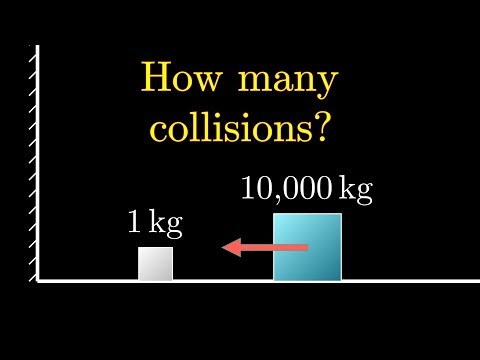

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('HEfHFsfGXjs')

In [1]:
from IPython.display import HTML
video = '<iframe width="560" height="315" src="https://www.youtube.com/embed/HEfHFsfGXjs" \
        frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture\
        -in-picture" allowfullscreen></iframe>'
HTML(video)

Completely mindblown, I decided to verify this probably useless but fascinating result, and maybe try to derive an analytical understanding of the how and why this *unexpected* result. The video gives credit to [Gregory Galperin](http://www.ux1.eiu.edu/~cfgg/), who discovered this result in the 1990s and published it in 2003 under the title ***Playing pool with π (the number π from a billiard point of view)***, Regular and Chaotic Dynamics, pp. 375--394, 2003 [[PDF](https://www.maths.tcd.ie/~lebed/Galperin.%20Playing%20pool%20with%20pi.pdf)]. Nonetheless, I have resisted the temptation to see Galperin's work and try my own version.

In order to simplify the way to address the problem I have broken it down into three parts:
 1. Use simple mechanics to study the general motion of the two blocks
 2. Use the results from part 1 to confirm that the number of clacks is equal to the first $d$ digits of $\pi$ when the masses satisfy the relation $M/m = 100^{d-1}$
 3. Try to understand the connection between the problem and $\pi$

# 1. Dynamics of the collision-reflection process

**Definitions:** for a clear treatment of each variable, the clack produced by one block hitting the other will be called ***collision***, whereas the clack produced a block hitting the wall will be called ***reflection***. We are interested on the total number of clacks given by 

\begin{equation} N_\text{clacks} = N_\text{collisions} + N_\text{reflections} \end{equation}

**Boundary conditions:** the initial state of the system is the large block (of mass $M$) moving with some constant speed $V_0$ before colliding with the small block (of mass $m$) initially at rest. The final state of the system is both block moving independently away from the wall. 
the large block moving with some constant speed $V_k$ before colliding with the small block (of mass $m$) initially at rest.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.facecolor':'white'})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
V0, v0 = 1, 0
V = [V0]
v = [v0]

lambda_ = 100**(1)
cnt = 0
k_max = int(10*(lambda_-1)+5)
print('k_max   :', k_max)
for k in range(1, k_max):
#     print(k)
    V_k = (lambda_-1)/(lambda_+1) * V[k-1] - (2)/(lambda_+1) * v[k-1]
    v_k = (2*lambda_)/(lambda_+1) * V[k-1] + (lambda_-1)/(lambda_+1) * v[k-1]
    V.append(V_k)
    v.append(v_k)
    cond1 = V_k < v_k and v_k <= 0  # both move backwards, big block moves faster
    cond2 = V_k < 0 and -V_k > v_k > 0  # big block moves backwards, small block will be reflected one more time
#     print('k =', k)
    if cond2:
        cnt = 2*k
        print('[break] Cond2 satisfied')
        break
    elif cond1:
        cnt = 2*k-1
        print('[break] Cond1 satisfied')
        break
print('k       :', k)
print('# clicks:', cnt)

k_max   : 995
[break] Cond1 satisfied
k       : 16
# clicks: 31


In [85]:
print('k  \t V     v')
print('-'*20)
for k, (Vk, vk) in enumerate(zip(V, v)):
    if (k<3 or k> len(V)-5):
        print('{}  \t{:.2f}  {:.2f}'.format(k, Vk, vk))
    elif k == 3:
        print('  \t...    ...')

k  	 V     v
--------------------
0  	1.00  0.00
1  	0.98  1.98
2  	0.92  3.88
  	...    ...
13  	-0.85  5.23
14  	-0.94  3.44
15  	-0.99  1.51
16  	-1.00  -0.48


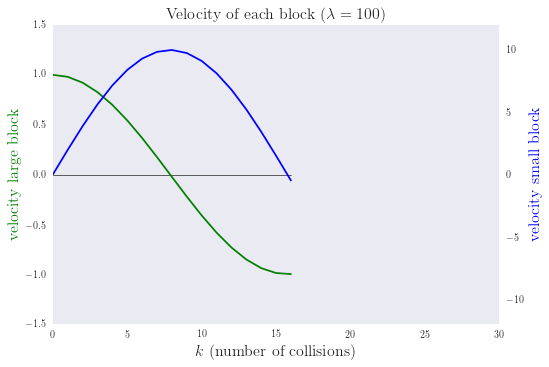

In [86]:
x = np.arange(0, len(V), 1)
zero = [0 for _ in range(len(V))]
fig, ax1 = plt.subplots()
ax1.plot(x, zero, 'k-', linewidth=0.6)
# ax1.text(0.35, 0.5, 'Close Me!', dict(size=30))
ax1.set_title('Velocity of each block ($\lambda={}$)'.format(lambda_), fontsize=16)

colorV = 'g'
colorv = 'b'

ax2 = ax1.twinx()
ax1.plot(x, V, '-', color=colorV)
ax2.plot(x, v, '-', color=colorv)

# ax1.set_xlabel('X data')
# ax1.set_ylabel('Y1 data', color='g')
# ax2.set_ylabel('Y2 data', color='b')
ax1.grid(False)
ax2.grid(False)

ax1.set_xlabel(r'$k$ (number of collisions)', fontsize=16)
ax1.set_ylabel('velocity large block', fontsize=16, color=colorV)
ax2.set_ylabel('velocity small block', fontsize=16, color=colorv);
# plt.xticks(np.arange(min(x), max(x)+1, 3))
# plt.axis([0, 23, -4, 4.9])
# ax1.legend(fontsize=20)
Vmax = 1.5
vmax = 12
xmax = 30#max(x)+1
ax1.set_xlim(0, xmax)
ax1.set_ylim(-Vmax, Vmax)
ax2.set_ylim(-vmax, vmax);

In [4]:
def clack_count(lambda_=1):
    # lambda_: M/m mass ratio
    V0, v0 = 1, 0
    V = [V0]
    v = [v0]

#     lambda_ = 100**(d-1)
    cnt = 0
    k_max = int(10*(lambda_-1)+5)
    for k in range(1, k_max):
        V_k = (lambda_-1)/(lambda_+1) * V[k-1] - (2)/(lambda_+1) * v[k-1]
        v_k = (2*lambda_)/(lambda_+1) * V[k-1] + (lambda_-1)/(lambda_+1) * v[k-1]
        V.append(V_k)
        v.append(v_k)
        cond_i  = V_k < v_k and v_k <= 0  # both move backwards, big block moves faster
        cond_ii = V_k < 0 and -V_k > v_k > 0  # big block moves backwards, small block will be reflected one more time
        
        if cond_i:
            cnt = 2*k-1
#             print('[break] cond_i satisfied')
            break
        elif cond_ii:
            cnt = 2*k
#             print('[break] cond_ii satisfied')
            break
#     print('k       :', k)
#     print('# clicks:', cnt)
    return cnt

In [6]:
clack_count(10)

10

In [13]:
for d in range(1, 7):
    lambda_ = 100**(d-1)
    num_clacks = clack_count(lambda_=lambda_)
#     print('clack_count(d={}): {}'.format(d, clack_count(lambda_=lambda_)))
    print(f'clack_count(d={d}): {num_clacks}')

clack_count(d=1): 3
clack_count(d=2): 31
clack_count(d=3): 314
clack_count(d=4): 3141
clack_count(d=5): 31415
clack_count(d=6): 314159
